# Case 3 - Customer Segmentation

## Author: Pedro Malandrin Klesse

- **Dataset**: https://www.kaggle.com/datasets/vetrirah/customer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dataframe = pd.read_csv('cs_train.csv')

In [16]:
dataframe.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [18]:
dataframe.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [37]:
dataframe = dataframe.drop(columns=['ID'])

## Dealing with NaN Values

In [19]:
dataframe.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [20]:
dataframe = dataframe.dropna()

In [23]:
dataframe.shape

(2154, 10)

## Feature Engineering

In [24]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

### Separating Columns

In [39]:
numeric_cols = dataframe.select_dtypes(include='number').columns
categorical_cols = dataframe.select_dtypes(include='object').columns

In [26]:
numeric_cols

Index(['ID', 'Age', 'Work_Experience', 'Family_Size'], dtype='object')

In [27]:
categorical_cols

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')

### Scaling

In [30]:
scaler = MinMaxScaler().fit(dataframe[numeric_cols])
dataframe[numeric_cols] = scaler.transform(dataframe[numeric_cols])

In [31]:
dataframe.describe()

,ID,Age,Work_Experience,Family_Size
count,2154.000000,2154.000000,2154.000000,2154.000000
mean,0.502032,0.358612,0.182252,0.229631
std,0.288614,0.236083,0.238923,0.195859
min,0.000000,0.000000,0.000000,0.000000
25%,0.255401,0.169014,0.000000,0.125000
50%,0.506292,0.323944,0.071429,0.125000
75%,0.748051,0.478873,0.285714,0.375000
max,1.000000,1.000000,1.000000,1.000000


### Encoding

In [32]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(dataframe[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
dataframe[encoded_cols] = encoder.transform(dataframe[categorical_cols])

In [40]:
dataframe[list(numeric_cols) + encoded_cols].head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0.253521,0.000000,0.000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.267606,0.571429,0.375,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.577465,0.785714,0.125,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.408451,0.000000,0.500,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.605634,0.357143,0.250,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Visualizing the Clusters Reducing the Dimensionality

In [41]:
from sklearn.manifold import TSNE

In [42]:
tsne = TSNE(n_components=2)

In [43]:
transformed = tsne.fit_transform(dataframe[encoded_cols + list(numeric_cols)])

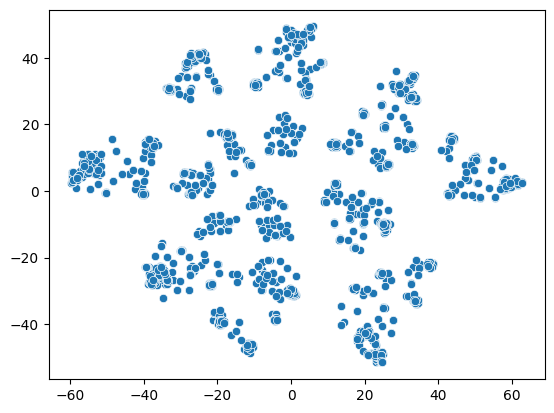

In [44]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1]);

In [120]:
X_original = dataframe[encoded_cols + list(numeric_cols)] # Default Values

In [66]:
data = {'x': transformed[:,0], 'y': transformed[:,1]}
X = pd.DataFrame(data) # Reformed by Dimension Reduction
    

## Unsupervised Learning Models

### KMeans

In [68]:
from sklearn.cluster import KMeans

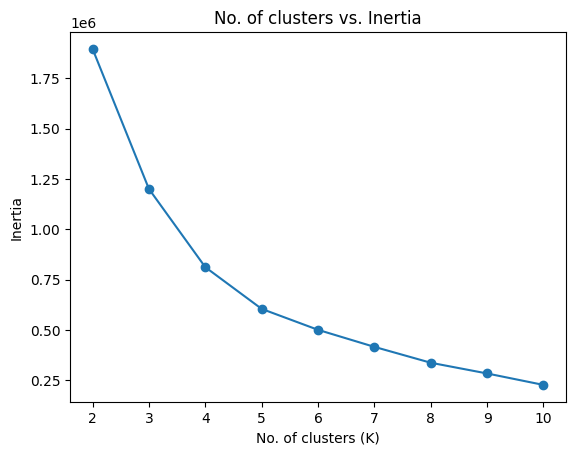

In [69]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42, n_init='auto').fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

In [85]:
model = KMeans(4, random_state=42, n_init='auto').fit(X)
preds = model.predict(X)

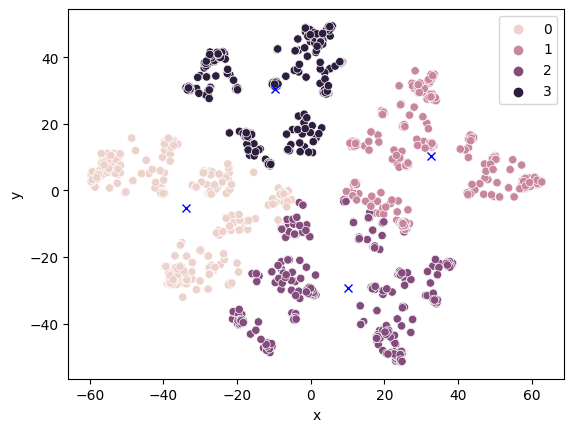

In [98]:
sns.scatterplot(data=X, x='x', y='y', hue=preds);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,1]
plt.plot(centers_x, centers_y, 'xb')

### DBScan

In [75]:
from sklearn.cluster import DBSCAN

In [118]:
model_db = DBSCAN(eps=4, min_samples=5)
model_db.fit(X)

DBSCAN(eps=4)

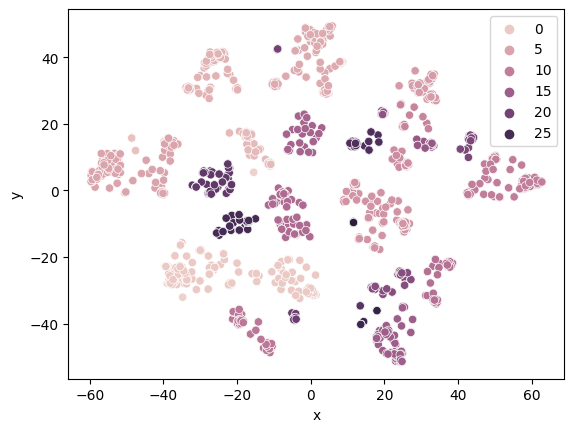

In [119]:
sns.scatterplot(data=X, x='x', y='y', hue=model_db.labels_);

### Hierarchical Clustering

In [99]:
from sklearn.cluster import AgglomerativeClustering

In [104]:
model_h = AgglomerativeClustering(n_clusters=4)

In [105]:
model_h.fit(X)

AgglomerativeClustering(n_clusters=4)

<Axes: xlabel='x', ylabel='y'>

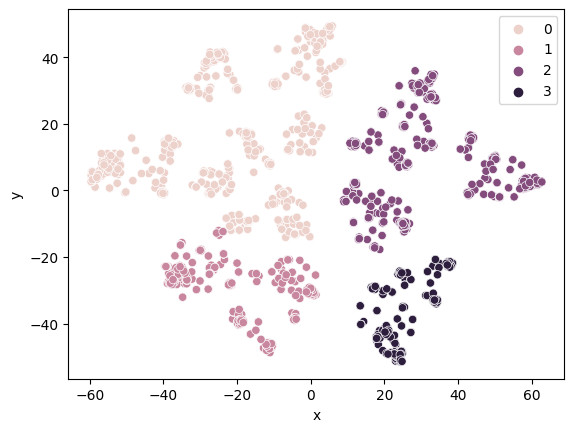

In [106]:
sns.scatterplot(data=X, x='x', y='y', hue=model_h.fit_predict(X))

## Visualizing the Labels in Plots of Two Attributes from the original dataset

In [121]:
X_original.columns

Index(['Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes',
       'Graduated_No', 'Graduated_Yes', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average',
       'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7', 'Age', 'Work_Experience', 'Family_Size',
       'Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes',
       'Graduated_No', 'Graduated_Yes', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average',
       'Spending_Score_High', 'Spend

In [123]:
dataframe.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes',
       'Graduated_No', 'Graduated_Yes', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average',
       'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

In [145]:
dataframe_final = pd.read_csv('cs_train.csv')

In [151]:
dataframe_final = dataframe_final.dropna().copy()

In [152]:
dataframe_final['Cluster'] = model_h.fit_predict(X)

In [156]:
dataframe_final.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,1
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,0
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,0
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,0
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,0


In [177]:
numeric_cols = dataframe_final.select_dtypes(include='number').columns

In [178]:
numeric_cols = numeric_cols.drop('ID')

In [179]:
dataframe_final[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 0 to 2626
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2154 non-null   int64  
 1   Work_Experience  2154 non-null   float64
 2   Family_Size      2154 non-null   float64
 3   Cluster          2154 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 84.1 KB


In [181]:
dataframe_final[numeric_cols].groupby(by=["Cluster"]).mean()

,Age,Work_Experience,Family_Size
Cluster,,,
0,51.087739,2.223847,2.785152
1,52.616188,2.211488,2.535248
2,29.252033,2.741463,3.343089
3,37.666667,3.692884,2.277154


 - **Group 1** has the smaller mean for the two attributes (Work_Experience, Family_Size), and the Bigger Age Mean
 - **Group 2** has the bigger Family_Size Mean, and the smaller Age mean
 - **Group 3** has the bigger Work_Experience Mean

In [184]:
dataframe_final[['Gender','Cluster']].groupby(by=["Cluster"]).value_counts()

Cluster  Gender
0        Male      754
         Female    135
1        Female    383
2        Male      430
         Female    185
3        Female    267
Name: count, dtype: int64

- **Group 0** Majority composed of Men
- **Grupo 1** Only have Women
- **Group 2** Majority of Men
- **Grupo 3** Only have Women

In [185]:
dataframe_final.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Cluster'],
      dtype='object')

In [186]:
dataframe_final[['Ever_Married','Cluster']].groupby(by=["Cluster"]).value_counts()

Cluster  Ever_Married
0        Yes             889
1        Yes             383
2        No              615
3        No              267
Name: count, dtype: int64

- **Group 0** All Married
- **Grupo 1** All Married
- **Group 2** No one married
- **Grupo 3** No one married

## Conclusion
- Cluster 0: Married Men
- Cluster 1: Married Men with an advanced Age
- Cluster 2: Non Married Men with Large Family
- Cluster 3: Non Married Women with a lot of Work Experience